## DRILL: Multivariable Regression
### Name: Crystal Lau
### Date: 06/22/2018

In [1]:
import math
import warnings

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

Equation: Propertycrime = α + Population + Population2 + Murder + Robbery

In [2]:
# importing data
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', thousands=',')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [4]:
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [5]:
# renaming columns w/o newlines
df.columns = ['City', 'Population', 'Violent_Crime', 'Murder_Nonnegligent_Manslaughter',
              'Rape_1', 'Rape_2', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
              'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson']

In [6]:
# dropping Rape_1 column because all NaN values and no data available for new definition of Rape
df.drop(['Rape_1'], axis=1, inplace=True)

In [7]:
# fill NaN columns under Arson with 0
# assumption is that if NaN, then none reported
df.fillna(0, inplace=True)

In [8]:
# creating pop^2 feature
df['Population2'] = np.square(df['Population'])

In [9]:
# for 'Robbery' and 'Murder'
# values > 0 are coded 1
# values = 0 are coded 0
df['rob_code'] = np.where(df['Robbery'] == 0, 0, 1)
df['murder_code'] = np.where(df['Murder_Nonnegligent_Manslaughter'] == 0, 0, 1)

In [10]:
df.head()

,City,Population,Violent_Crime,Murder_Nonnegligent_Manslaughter,Rape_2,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,Population2,rob_code,murder_code
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,3463321,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929,0,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.000,9595377936,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.000,40806544,1,0


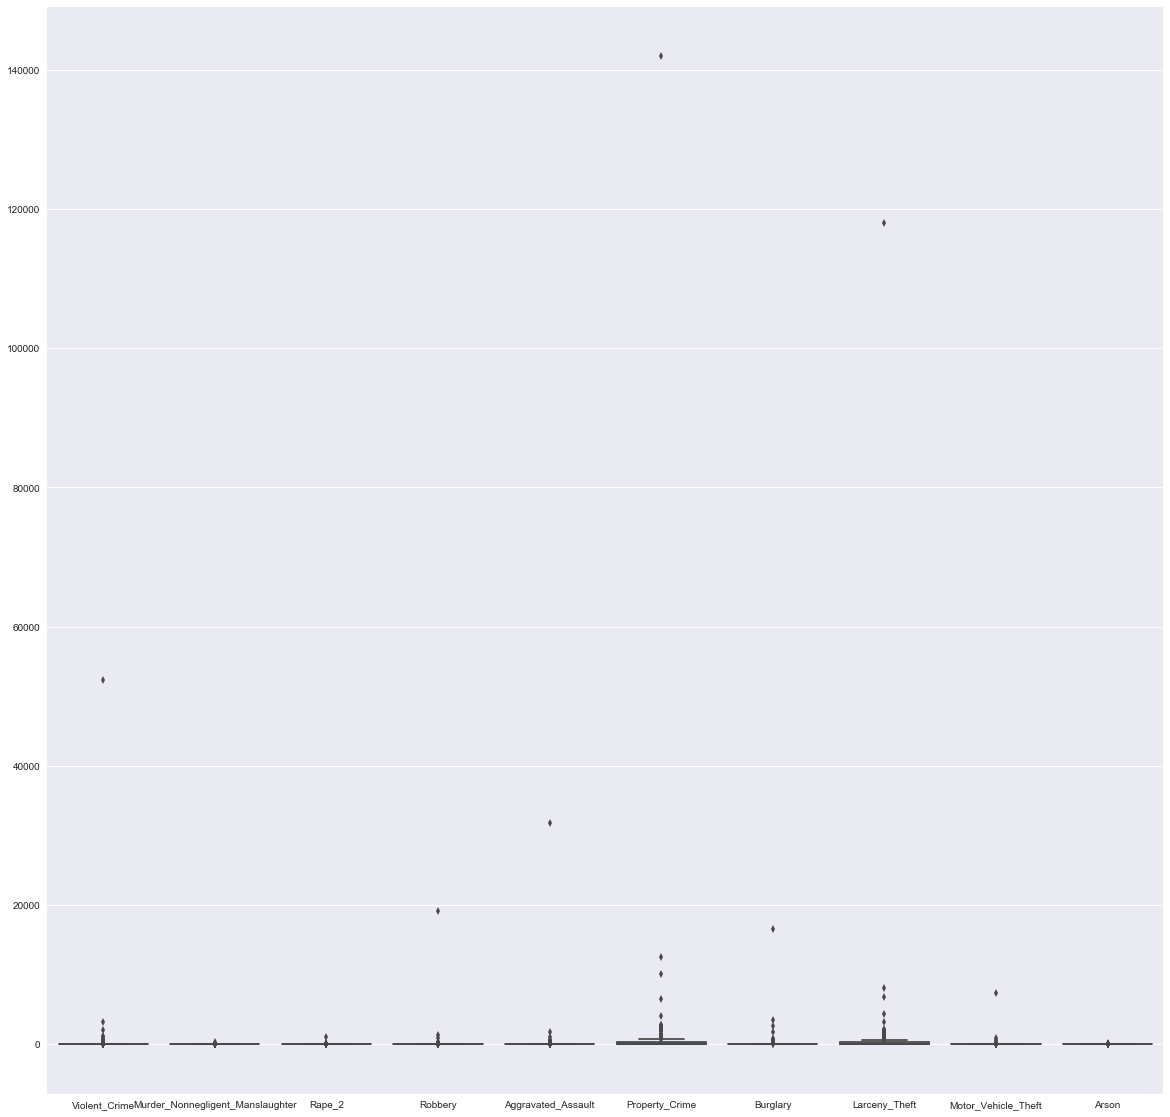

In [27]:
df_2 = df.drop(labels=['City', 'rob_code', 'murder_code', 'Population2', 'Population'], axis=1)
sns.set(rc={'figure.figsize':(20,20)})
sns.boxplot(data=df_2)

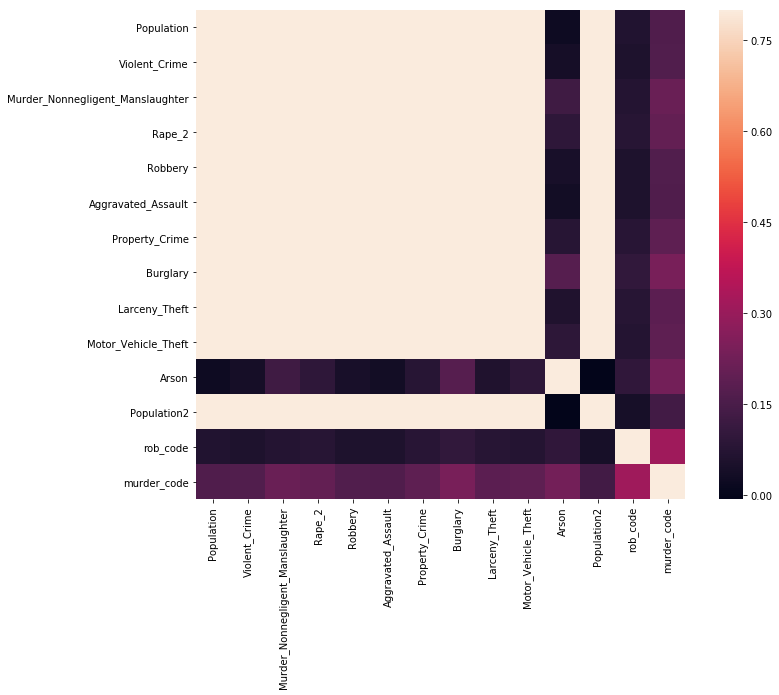

In [11]:
# heat map of correlation values
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Version 1

In [12]:
regr = linear_model.LinearRegression()
Y = df['Property_Crime'].values.reshape(-1, 1)
X = df[['Violent_Crime','murder_code', 'Population2']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)

print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 4.01815927e+00  2.15535616e+02 -9.77170338e-10]]

Intercept: 
 [151.12535859]

R-squared:
0.9981093560650567


R-Squared value is pretty high.

target leakage: one or more variables are highly correlated that they 'leak' into the target feature (almost perfectly describe)

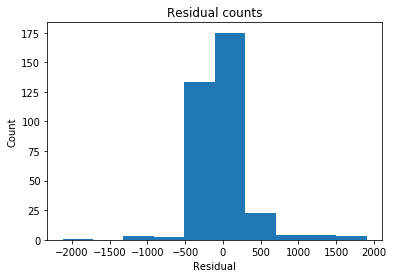

In [14]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property_Crime']

# Calculate the residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Validation

x-train: .66, x_text: .33 (same for y)

Description: Using train test split to withhold data and train a model based on 66% of the data and test the model on the untrained 33%.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [16]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, y_train))


Coefficients: 
 [[ 4.01476239e+00  1.67451517e+02 -9.73824000e-10]]

Intercept: 
 [144.73334474]

R-squared:
0.9987755302607414


In [18]:
print(regr.score(X_test, y_test))

0.6910518657435635


fixes
- add more rows (more info to the data to train)
- add more features (in this case)
    generally for overfitting,drop features

## Version 2

In [19]:
regr = linear_model.LinearRegression()
Y = df['Property_Crime'].values.reshape(-1, 1)
X = df[['Population2', 'Violent_Crime', 'Aggravated_Assault']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-1.10802985e-09  3.73119185e+00  7.69805863e-01]]

Intercept: 
 [172.61416311]

R-squared:
0.9980316511150817


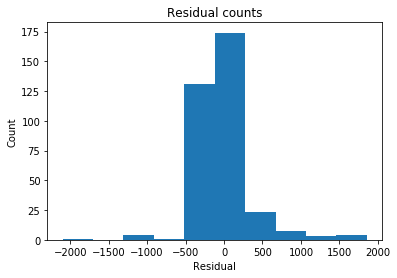

In [21]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Property_Crime']

# Calculate the residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

filter by 75% mark

In [22]:
df_2014 = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv', thousands=',', header=4)

In [24]:
df_2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,nan
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,nan
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,nan
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,nan
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,nan


In [25]:
df_violcrime = df.query('Violent_Crime > 1000')
df_violcrime.head()

,City,Population,Violent_Crime,Murder_Nonnegligent_Manslaughter,Rape_2,Robbery,Aggravated_Assault,Property_Crime,Burglary,Larceny_Theft,Motor_Vehicle_Theft,Arson,Population2,rob_code,murder_code
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,0.000,66971746521,1,1
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,0.000,70494931807876,1,1
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132.000,44336355844,1,1
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57.000,20688219556,1,1
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.000,39654349956,1,1


In [38]:
df_2014.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000,nan
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000,nan
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000,nan
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000,nan
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000,nan


## Validation with untrained data from new dataset

In [26]:
df_2014.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [27]:
df_2014.drop(['Unnamed: 13'], axis=1, inplace=True)

In [29]:
df_2014.columns = ['City', 'Population', 'Violent_Crime', 'Murder_Nonnegligent_Manslaughter',
              'Rape_1 (revised)', 'Rape_2 (legacy)', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
              'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson']

In [30]:
# dropping legacy definition as there is no data recorded
df_2014.drop(['Rape_2 (legacy)'], axis=1, inplace=True)

In [31]:
# fill NaN columns under Arson with 0
# assumption is that if NaN, then none reported
df_2014.fillna(0, inplace=True)

In [36]:
# creating a population squared feature
df_2014['Population2'] = np.square(df_2014['Population'])

In [34]:
# creating rob and murder code for 2014 data set
df_2014['rob_code'] = np.where(df_2014['Robbery'] == 0, 0, 1)
df_2014['murder_code'] = np.where(df_2014['Murder_Nonnegligent_Manslaughter'] == 0, 0, 1)

In [48]:
df_2014.drop([369,370,371,372,373,374,375], inplace=True)

In [49]:
# validating regression model against foreign data set
regr.score(df_2014['Property_Crime'].values.reshape(-1, 1), df_2014[['Violent_Crime','murder_code', 'Population2']])

ValueError: shapes (369,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)